Procesamiento y Clasificación de Datos\
Tarea 1 \
Gloria Samanta Servín García 1731703\
18 Mayo 2022

In [1]:
import requests 
print (requests.get('http://google.com').text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="l5_6nsPTrPGYxy5MpD5pdA">(function(){window.google={kEI:'xleFYsm2F7DQkPIPj4uPuA4',kEXPI:'0,1302536,56873,6058,207,4804,2316,383,246,5,1354,4013,1123753,1197725,380765,16115,17444,11240,17572,4858,1362,9290,3028,4747,1841,4720,6273,4020,978,13228,3847,10622,7432,15309,5968,706,1279,2742,149,1103,840,1983,213,4101,3514,606,2023,1777,520,6344,8326,3227,2845,7,17450,15767,553,17175,432,3,346,1244,1,5445,148,11323,991,1661,4,1528,2304,7039,20309,1714,3050,2658,7355,13660,2980,1457,15351

In [2]:
#Obtenemos nuestros datos desde Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs

In [4]:
LW = codecs.open("/content/drive/MyDrive/MCD/Procesamiento/The Project Gutenberg eBook of Little Women, by Louisa May Alcott.html", 'r', 'utf-8')
print('Done!')

Done!


In [5]:
#Vamos a corroborar que se tiene el archivo adecuado buscando un fragmento
soup = BeautifulSoup(LW)

text = soup.get_text()
print(text[32000:34000])

 shall take the cream and the muffings,” added Amy, heroically
giving up the article she most liked.


Meg was already covering the buckwheats, and piling the bread into one big
plate.


“I thought you’d do it,” said Mrs. March, smiling as if
satisfied. “You shall all go and help me, and when we come back we will
have bread and milk for breakfast, and make it up at dinnertime.”


They were soon ready, and the procession set out. Fortunately it was early, and
they went through back streets, so few people saw them, and no one laughed at
the queer party.


A poor, bare, miserable room it was, with broken windows, no fire, ragged
bedclothes, a sick mother, wailing baby, and a group of pale, hungry children
cuddled under one old quilt, trying to keep warm.


How the big eyes stared and the blue lips smiled as the girls went in.


“Ach, mein Gott! It is good angels come to us!” said the poor
woman, crying for joy.


“Funny angels in hoods and mittens,” said Jo, and set them to
laughing.


In

In [6]:
#Iniciamos el proceso de limpieza de datos
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

print(tokens[:100])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Little', 'Women', 'by', 'Louisa', 'May', 'Alcott', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'text', 'align', 'justify', 'h1', 'h2', 'h3', 'h4', 'h5', 'text', 'align', 'center', 'font', 'style', 'normal', 'font', 'weight', 'normal', 'line', 'height', '1', '5', 'margin', 'top', '5em', 'margin', 'bottom', '5em', 'h1', 'font', 'size', '300', 'margin', 'top', '0', '6em', 'margin', 'bottom', '0', '6em', 'letter', 'spacing', '0', '12em', 'word', 'spacing', '0', '2em', 'text', 'indent', '0em', 'h2', 'font', 'size', '150', 'margin', 'top', '2em', 'margin', 'bottom', '1em', 'h3', 'font', 'size', '130', 'margin', 'top', '1em', 'h4', 'font', 'size', '120', 'h5', 'font', 'size', '110', 'no', 'break', 'page', 'break', 'before', 'avoid', 'for']


In [7]:
words = [word.lower() for word in tokens]

print(words[:100])

['the', 'project', 'gutenberg', 'ebook', 'of', 'little', 'women', 'by', 'louisa', 'may', 'alcott', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'text', 'align', 'justify', 'h1', 'h2', 'h3', 'h4', 'h5', 'text', 'align', 'center', 'font', 'style', 'normal', 'font', 'weight', 'normal', 'line', 'height', '1', '5', 'margin', 'top', '5em', 'margin', 'bottom', '5em', 'h1', 'font', 'size', '300', 'margin', 'top', '0', '6em', 'margin', 'bottom', '0', '6em', 'letter', 'spacing', '0', '12em', 'word', 'spacing', '0', '2em', 'text', 'indent', '0em', 'h2', 'font', 'size', '150', 'margin', 'top', '2em', 'margin', 'bottom', '1em', 'h3', 'font', 'size', '130', 'margin', 'top', '1em', 'h4', 'font', 'size', '120', 'h5', 'font', 'size', '110', 'no', 'break', 'page', 'break', 'before', 'avoid', 'for']


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
sw = nltk.corpus.stopwords.words('english')

print(sw[:100])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [9]:
words_ns = [word for word in words if word not in sw]

print(words_ns[:100])

['project', 'gutenberg', 'ebook', 'little', 'women', 'louisa', 'may', 'alcott', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'text', 'align', 'justify', 'h1', 'h2', 'h3', 'h4', 'h5', 'text', 'align', 'center', 'font', 'style', 'normal', 'font', 'weight', 'normal', 'line', 'height', '1', '5', 'margin', 'top', '5em', 'margin', 'bottom', '5em', 'h1', 'font', 'size', '300', 'margin', 'top', '0', '6em', 'margin', 'bottom', '0', '6em', 'letter', 'spacing', '0', '12em', 'word', 'spacing', '0', '2em', 'text', 'indent', '0em', 'h2', 'font', 'size', '150', 'margin', 'top', '2em', 'margin', 'bottom', '1em', 'h3', 'font', 'size', '130', 'margin', 'top', '1em', 'h4', 'font', 'size', '120', 'h5', 'font', 'size', '110', 'break', 'page', 'break', 'avoid', 'epubs', 'div', 'chapter', 'page', 'break', 'always']


In [10]:
import nltk
nltk.download('all')
lemmatizer = WordNetLemmatizer() 

print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("miss :", lemmatizer.lemmatize("miss", pos ="a"))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [11]:
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]

print(words_lem[:10])

['project', 'gutenberg', 'ebook', 'little', 'woman', 'louisa', 'may', 'alcott', 'body', 'margin']


In [12]:
from nltk.corpus import brown
from nltk import FreqDist
fd = FreqDist(words_ns)
fd['Jo']  # count of a specific word
fd.freq('Jo')  # frequency of a specific word
fd.N()  # total number of samples
fd.most_common(10)
#for sample in fd:
 #   print (sample)
#fd.max()
#fd.tabulate()
#fd.plot()
#fd1 |= fd2  # update fd1 with counts from fd2
#fd1 < fd2  

[('jo', 1362),
 ('said', 827),
 ('little', 730),
 ('one', 725),
 ('meg', 686),
 ('amy', 652),
 ('laurie', 598),
 ('like', 591),
 ('beth', 467),
 ('good', 462)]

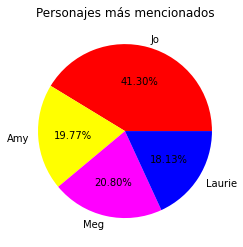

In [15]:
import matplotlib.pyplot as plt

etiquetas = ['Jo','Amy','Meg','Laurie']
valores = [1362,652,686,598]
colores = ['red','yellow','magenta','blue']
 
plt.pie(x=valores, labels=etiquetas, colors = colores, autopct='%1.2f%%')
 
plt.title('Personajes más mencionados')
 
plt.show()

<FreqDist with 10908 samples and 93107 outcomes>


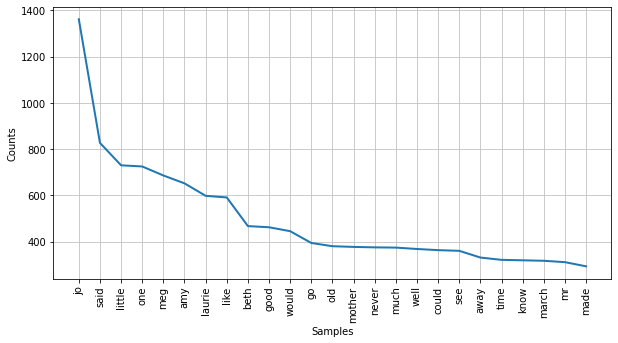

In [13]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)
print(freqdist)
# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

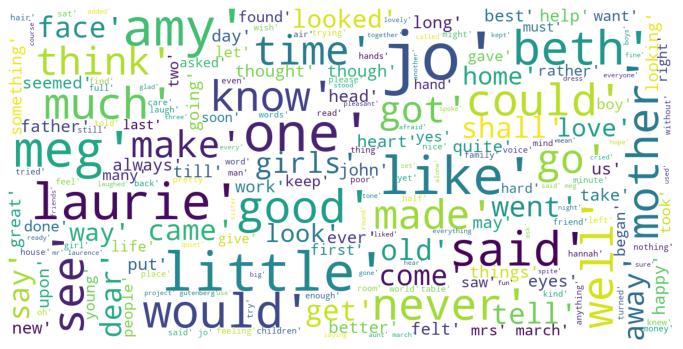

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_ns)